# Team 1 CS 105 Final Project

Our project works with....Our dataset is...

In total, the downloaded dataset has 50,000 reviews split between 25,000 train and test sets. There is also an even split of positive and negative reviews (25,000 total for each) among the train and test sets. A negative label correspondes to an Imdb raiting of 1-4 and a positive label corresponds to an Imdb rating of 7-10. For our project, we plan to build our classifier using a smaller subset of 5,000 total reviews. We decided that a stratified sample between positive and negative reviews would give us the most balanced labeled set to work with. Since we aim to work with 5,000 reviews total, we will split our sample into 2,500 positive and negative reviews, which we will pull from the train set.

In [6]:
import os
import shutil
import numpy as np

# Code to select 2500 negative reviews from train set
sub_dir_neg = 'E:/CS105-Final-Project/aclImdb/train/neg'
files_neg = os.listdir(sub_dir_neg)

random_2500_neg = np.random.choice(files_neg, 2500, replace=False)

for x in random_2500_neg:
    shutil.copy(os.path.join(sub_dir_neg, x),'E:/CS105-Final-Project/Project Datasets/neg')

In [7]:
# Code to select 2500 positive reviews from train set
sub_dir_pos = 'E:/CS105-Final-Project/aclImdb/train/pos'
files_pos = os.listdir(sub_dir_pos)

random_2500_pos = np.random.choice(files_pos, 2500, replace=False)

for x in random_2500_pos:
    shutil.copy(os.path.join(sub_dir_pos, x),'E:/CS105-Final-Project/Project Datasets/pos')

Now, we will start processing the reviews and build the vocabulary for our bag-of-worlds model.

In [44]:
import codecs
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

neg_dir = 'E:/CS105-Final-Project/Project Datasets/neg'
pos_dir = 'E:/CS105-Final-Project/Project Datasets/pos'

indices = []
train = []

for file in os.listdir(neg_dir):
    f = os.path.join(neg_dir, file)
    text_input = codecs.open(f, 'r', encoding='utf-8', errors='ignore')
    text = text_input.read()
    train.append(text)
    indices.append(file[:-4])
    text_input.close()

for file in os.listdir(pos_dir):
    f = os.path.join(pos_dir, file)
    text_input = codecs.open(f, 'r', encoding='utf-8', errors='ignore')
    text = text_input.read()
    train.append(text)
    indices.append(file[:-4])
    text_input.close()

# Tf-IDF Vectorizor
# Don't indlude stop words in vocabulary
# Only include tokens that appear in at least 10 documents
# Remove strictly numeric tokens
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words='english', min_df=10,token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

tfidf_word_matrix = tfidfvectorizer.fit_transform(train)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(data = tfidf_word_matrix.toarray(), index = indices, columns = tfidf_tokens)

# Labelling data
df_tfidf['LABEL'] = 'Negative'
df_tfidf.iloc[2500:,-1] = 'Positive'

df_tfidf

,13th,1930s,1940s,1950s,1960s,1970s,1980s,1990s,19th,1st,...,youngest,youth,youthful,youtube,z,zero,zombie,zombies,zone,LABEL
3670_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
10348_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
10771_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
10841_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
6315_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
7873_8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
1924_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
8416_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


Now, let's create our train and test sets. We will first look at how Gaussian Naive Bayes performs.

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating Train and Test sets
X = np.array(df_tfidf.drop(['LABEL'], axis=1))
Y = np.array(df_tfidf['LABEL'])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=123)

naive = GaussianNB()
naive.fit(X_train, Y_train)

Y_pred_NB = naive.predict(X_test)
print('Accuracy using Gaussian Naive Bayes =', accuracy_score(Y_test, Y_pred_NB))

Accuracy using Gaussian Naive Bayes = 0.722


In [46]:
# Print Classification Report
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72       253
    Positive       0.72      0.72      0.72       247

    accuracy                           0.72       500
   macro avg       0.72      0.72      0.72       500
weighted avg       0.72      0.72      0.72       500



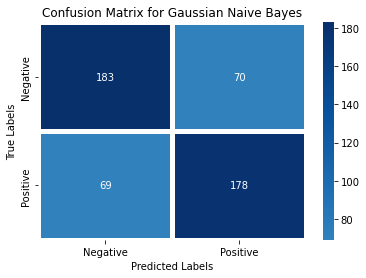

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion matrix heatmap
cf = confusion_matrix(Y_test, Y_pred)
ax = plt.subplot()
sns.heatmap(cf, annot=True, fmt='d', ax=ax, linewidths=5, cmap="Blues", center=0)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Gaussian Naive Bayes')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

As you can see from the confusion matrix, from our test set, we correctly classified 183 negative reviews correctly and 178 positive reviews correctly. We incorrectly classified 70 negative reviews as positive and 69 positive reviews as negative. Let's now test how a SVM model will perform using the same train and test sets.

In [50]:
from sklearn.svm import SVC

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, Y_train)

Y_pred_SVM = SVM.predict(X_test)
print('Accuracy using SVM =', accuracy_score(Y_test, Y_pred_SVM))

Accuracy using SVM = 0.838


In [51]:
# Print Classification Report
print(classification_report(Y_test, Y_pred_SVM))

              precision    recall  f1-score   support

    Negative       0.86      0.81      0.84       253
    Positive       0.82      0.87      0.84       247

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



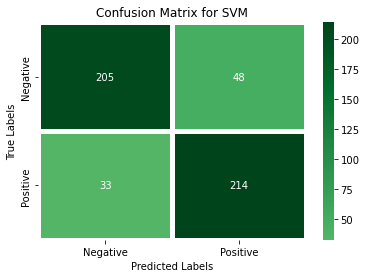

In [55]:
# Plot Confusion matrix heatmap
cf = confusion_matrix(Y_test, Y_pred_SVM)
ax = plt.subplot()
sns.heatmap(cf, annot=True, fmt='d', ax=ax, linewidths=5, cmap="Greens", center=0)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for SVM')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

As you can see from the confusion matrix, from our test set, we correctly classified 205 negative reviews correctly and 214 positive reviews correctly. We incorrectly classified 48 negative reviews as positive and 33 positive reviews as negative. Our SVM model performs slightly better than Gaussian Naive Bayes, so we will save SVM as our final model.

In [56]:
import pickle

filename = 'review_classifier.pkl'
f = open(filename, 'wb')
pickle.dump(SVM, f)
f.close()